In [213]:
import sys
import os
import pandas as pd
import numpy as np
import random
sys.path.append("../")


In [214]:
def resample_data(df, time_window):
    print(f"[*] Resampling data based on {time_window} time window")
    df_remove_dup = df.drop_duplicates('time', keep='first', inplace=False, ignore_index=True)
    resampled_data = pd.DataFrame()
    resampler = df_remove_dup.set_index('time').resample(time_window)
    resampled_groups = resampler.groups
    for key in resampled_groups:
        indices = resampler._get_index(key)
        # If there are values in the group bin
        if len(indices):
            # Pick a random value from the group
            indx_choice = [np.random.choice(indices)]
            # Get the picked value from df
            value_df = df_remove_dup.take(indx_choice)
            resampled_data = pd.concat([resampled_data, value_df])      
    print("Done")
    return resampled_data

In [215]:
from google.colab import drive
drive.mount('/content/gdrive')
path="gdrive/My Drive/Colab Notebooks/Big_Data_AQI_Estimation-master/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# MNR Data set

**1. Processed_sensor_data**

In [216]:
#step 1: read data
MNR_data_path = path + "Data Processed/MNR Processed/"
MNR_resampled_path = os.path.join(MNR_data_path, "30S Resampled")
MNR_sensor_data_resampled_raw = pd.read_csv(os.path.join(MNR_resampled_path, "MNR_sensor_data_resampled_raw.csv"))
MNR_sensor_data_resampled_processed = pd.read_csv(os.path.join(MNR_resampled_path, "MNR_sensor_data_resampled_processed.csv"))
MNR_sensor_data_resampled_labels = pd.read_csv(os.path.join(MNR_resampled_path, "MNR_sensor_data_resampled_labels.csv"))

In [217]:
MNR_sensor_data_resampled_processed.head()

,timestamp,hum,tem,uv,part_of_day_Afternoon,part_of_day_Evening,part_of_day_Morning,Not rush hour,Rush hour,distance_to_airport
0,2020-02-28 07:48:55,62,27,0,0.0,0.0,1.0,0.0,1.0,2.771267
1,2020-02-28 07:49:07,62,28,0,0.0,0.0,1.0,0.0,1.0,2.738353
2,2020-02-28 07:49:30,61,27,0,0.0,0.0,1.0,0.0,1.0,2.683521
3,2020-02-28 07:50:15,65,28,0,0.0,0.0,1.0,0.0,1.0,2.586430
4,2020-02-28 07:50:34,68,28,0,0.0,0.0,1.0,0.0,1.0,2.539494


In [218]:
MNR_sensor_data_resampled_labels.head()

,o3_8,o3,pm10,pm25,co,so2,so2_24,no2,aqi,aqi_rank
0,0,0,90,172,5,35,0,7,211.545546,4
1,0,0,92,176,5,35,0,7,213.507508,4
2,0,0,92,176,5,34,0,7,213.507508,4
3,0,0,90,176,5,34,0,7,213.507508,4
4,0,0,90,176,5,37,0,7,213.507508,4


In [219]:
#Step 2: Statistical Analysis
MNR_sensor_data_resampled_processed.describe()

,hum,tem,uv,part_of_day_Afternoon,part_of_day_Evening,part_of_day_Morning,Not rush hour,Rush hour,distance_to_airport
count,2276.000000,2276.000000,2276.000000,2276.000000,2276.000000,2276.000000,2276.000000,2276.000000,2276.000000
mean,76.076011,32.608963,0.061072,0.230668,0.365554,0.403779,0.267135,0.732865,3.580512
std,14.650955,3.763210,0.244959,0.421353,0.481691,0.490762,0.442561,0.442561,0.995979
min,29.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.173340
25%,68.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.562300
50%,76.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.476783
75%,87.000000,34.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4.578840
max,99.000000,45.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.232962


In [220]:
MNR_sensor_data_resampled_labels.describe()

,o3_8,o3,pm10,pm25,co,so2,so2_24,no2,aqi,aqi_rank
count,2276.0,2276.0,2276.000000,2276.000000,2276.000000,2276.000000,2276.0,2276.000000,2276.000000,2276.000000
mean,0.0,0.0,62.598418,123.130053,4.917838,21.845782,0.0,8.554482,181.461533,3.114675
std,0.0,0.0,23.392729,35.840265,2.070370,5.501124,0.0,0.875615,22.805859,0.454075
min,0.0,0.0,30.000000,36.000000,2.000000,10.000000,0.0,6.000000,89.333333,1.000000
25%,0.0,0.0,50.000000,108.000000,4.000000,18.000000,0.0,8.000000,172.715328,3.000000
50%,0.0,0.0,62.000000,124.000000,4.000000,21.000000,0.0,8.000000,180.890511,3.000000
75%,0.0,0.0,72.000000,140.000000,6.000000,25.000000,0.0,9.000000,189.065693,3.000000
max,0.0,0.0,342.000000,380.000000,15.000000,65.000000,0.0,10.000000,410.643095,5.000000


In [221]:
#Step 3: Plotting statistics
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=20, 20

In [222]:
# Combine labels with data
MNR_sensor_data_resampled_processed_combine = pd.concat([MNR_sensor_data_resampled_processed, MNR_sensor_data_resampled_labels], axis=1)

In [223]:
MNR_sensor_data_resampled_processed_combine.isnull().sum()

timestamp                0
hum                      0
tem                      0
uv                       0
part_of_day_Afternoon    0
part_of_day_Evening      0
part_of_day_Morning      0
Not rush hour            0
Rush hour                0
distance_to_airport      0
o3_8                     0
o3                       0
pm10                     0
pm25                     0
co                       0
so2                      0
so2_24                   0
no2                      0
aqi                      0
aqi_rank                 0
dtype: int64

In [224]:
MNR_sensor_data_resampled_processed_combine.head()

,timestamp,hum,tem,uv,part_of_day_Afternoon,part_of_day_Evening,part_of_day_Morning,Not rush hour,Rush hour,distance_to_airport,o3_8,o3,pm10,pm25,co,so2,so2_24,no2,aqi,aqi_rank
0,2020-02-28 07:48:55,62,27,0,0.0,0.0,1.0,0.0,1.0,2.771267,0,0,90,172,5,35,0,7,211.545546,4
1,2020-02-28 07:49:07,62,28,0,0.0,0.0,1.0,0.0,1.0,2.738353,0,0,92,176,5,35,0,7,213.507508,4
2,2020-02-28 07:49:30,61,27,0,0.0,0.0,1.0,0.0,1.0,2.683521,0,0,92,176,5,34,0,7,213.507508,4
3,2020-02-28 07:50:15,65,28,0,0.0,0.0,1.0,0.0,1.0,2.586430,0,0,90,176,5,34,0,7,213.507508,4
4,2020-02-28 07:50:34,68,28,0,0.0,0.0,1.0,0.0,1.0,2.539494,0,0,90,176,5,37,0,7,213.507508,4


In [225]:
# Compute the correlation between our features with aqi values and aqi ranks
# First need to drop unecessary columns
# Here we remove all columns that we are not used as features in the models
MNR_sensor_data_resampled_processed_combine_drop = MNR_sensor_data_resampled_processed_combine.drop(columns=\
                                                                                                    ["timestamp", "o3_8", "o3", "pm10", \
                                                                                                     "pm25", "co", "so2", "so2_24", "no2"])
aqi_values = MNR_sensor_data_resampled_processed_combine_drop[["aqi"]]
aqi_ranks = MNR_sensor_data_resampled_processed_combine_drop[["aqi_rank"]]

corr_matrix = MNR_sensor_data_resampled_processed_combine_drop.corr()

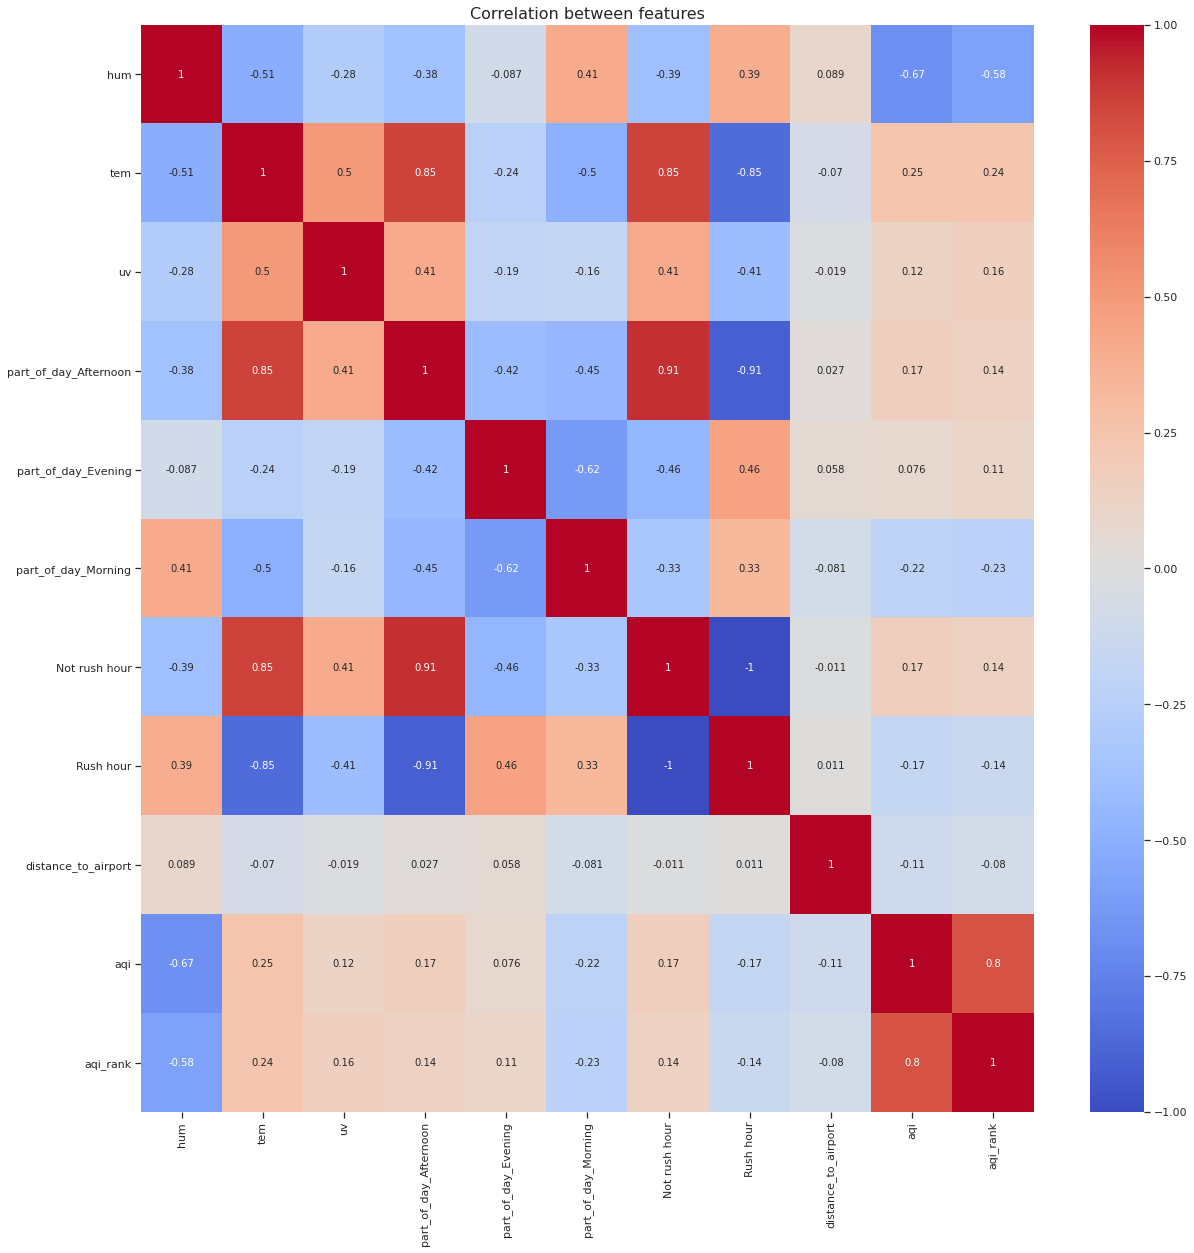

In [226]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between features', fontsize=16)
plt.show()

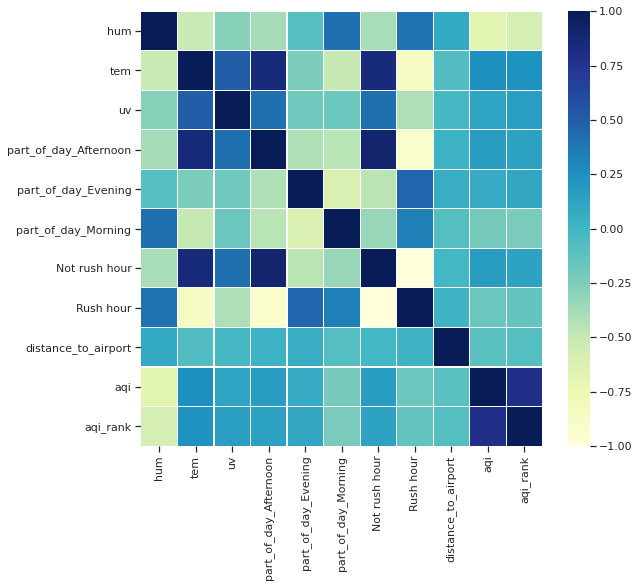

In [227]:
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corr_matrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [228]:
line_colors = [(31,119,180), (255, 127, 14), (44, 160, 44), (214, 39, 40), (148, 103, 189), 
             (177, 3, 24), (0, 107 , 164), (65, 68, 81)]
             
scatter_colors = [(174,199,232), (255,187,120), (152,223,138), (255,152,150), 
                  (197,176,213), (196,156,148), (247,182,210), (199,199,199), 
                  (158,218,229)]
  
for i in range(len(line_colors)):  
    r, g, b = line_colors[i]  
    line_colors[i] = (r / 255., g / 255., b / 255.)
for i in range(len(scatter_colors)):  
    r, g, b = scatter_colors[i]  
    scatter_colors[i] = (r / 255., g / 255., b / 255.)

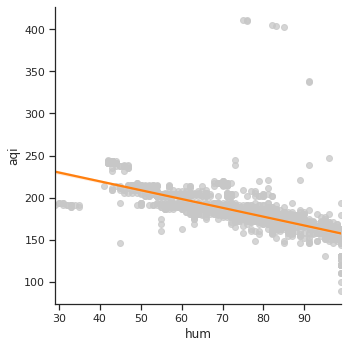

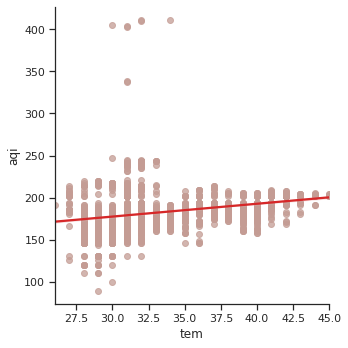

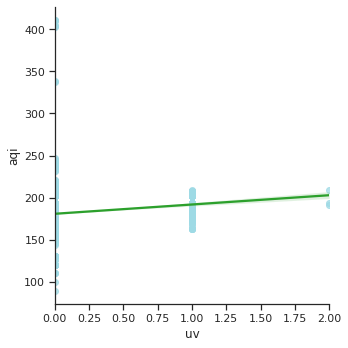

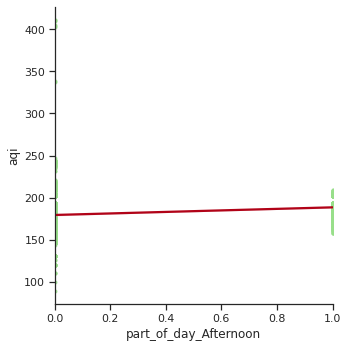

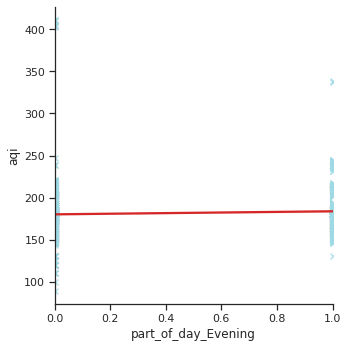

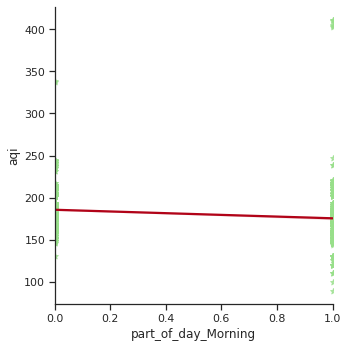

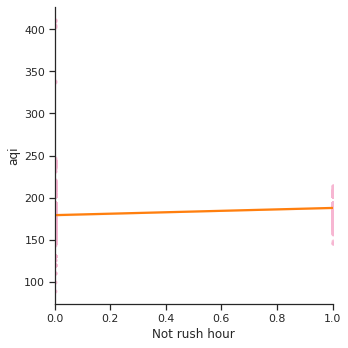

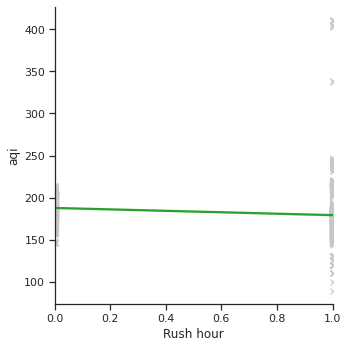

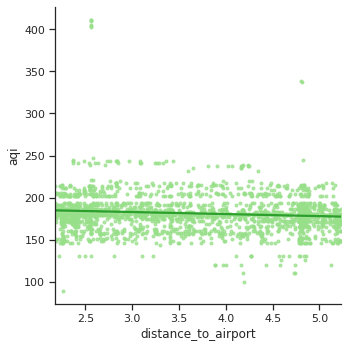

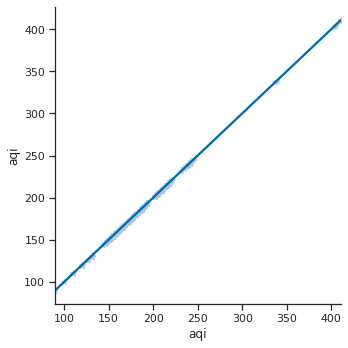

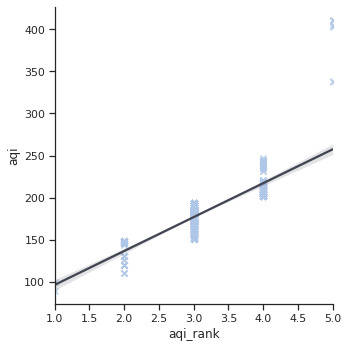

In [229]:
# Visualize linear relationships between each feature and AQI values
marker_list = ['x', 'o', '*','.']
sns.set(style='ticks', color_codes=True)
for i in MNR_sensor_data_resampled_processed_combine_drop.columns.tolist():
    a = random.randint(0, len(scatter_colors) - 1)
    b = random.randint(0,len(line_colors) - 1)
    c = random.randint(0,len(marker_list) - 1) 
    sns.lmplot(x=i, y='aqi', data = MNR_sensor_data_resampled_processed_combine_drop, 
               scatter_kws = {'color':scatter_colors[a], 'alpha': 0.75}, line_kws={'color': line_colors[b]}, markers=marker_list[c])


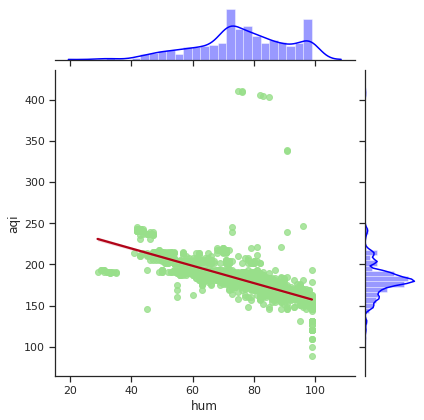

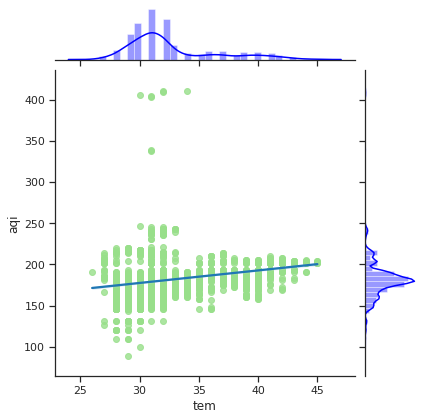

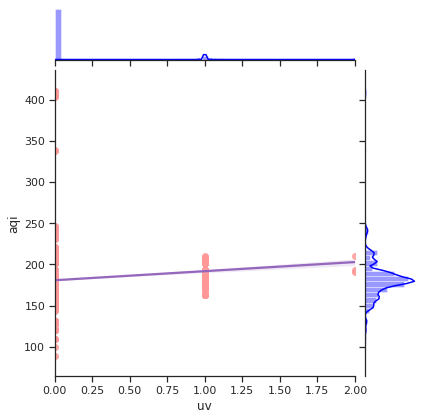

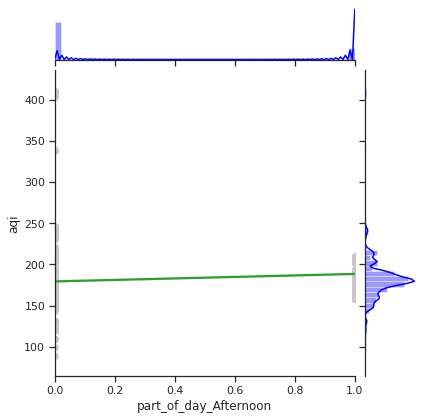

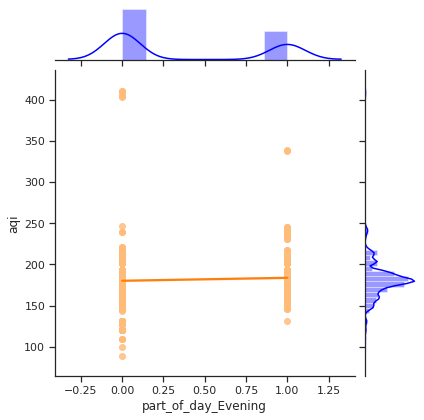

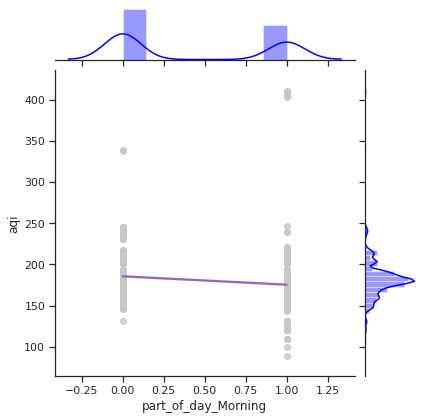

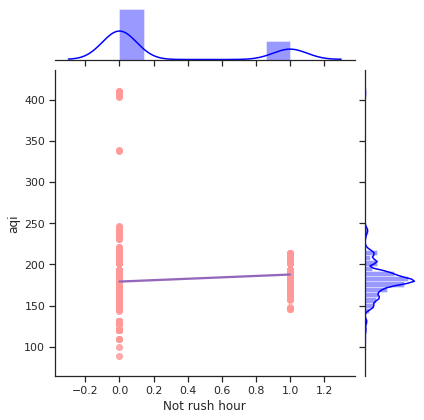

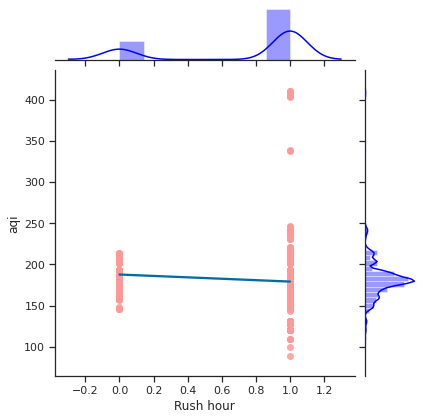

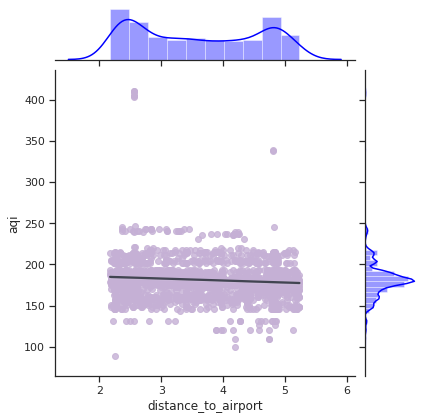

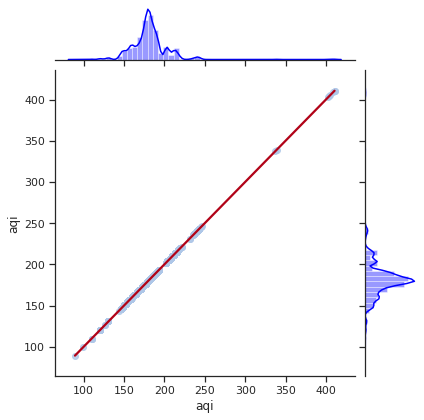

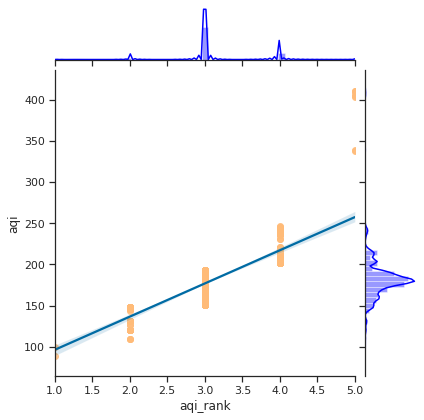

In [230]:
sns.set(style='ticks', color_codes=True)
for i in MNR_sensor_data_resampled_processed_combine_drop.columns.tolist():
    a = random.randint(0, len(scatter_colors) - 1)
    b = random.randint(0,len(line_colors) - 1)
    c = random.randint(0,len(marker_list) - 1)  
    sns.jointplot(x=i, y='aqi', data = MNR_sensor_data_resampled_processed_combine_drop, kind ='reg', color = 'blue',
                  joint_kws={'line_kws':{'color':line_colors[b]}, 
                             'scatter_kws':{'color':scatter_colors[a]}})

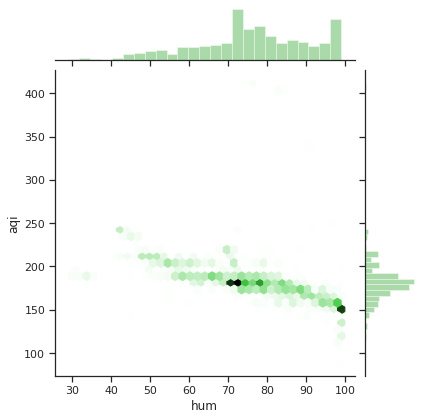

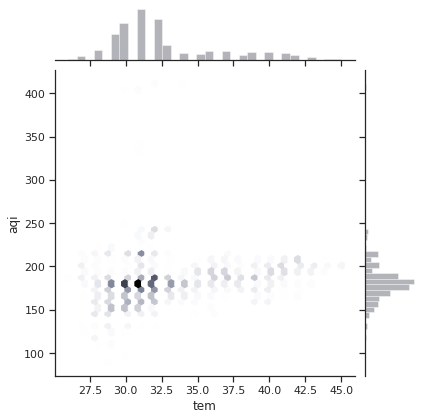

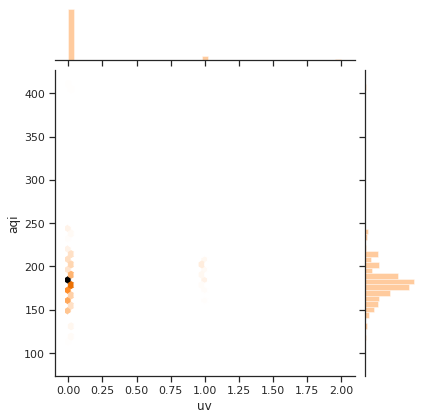

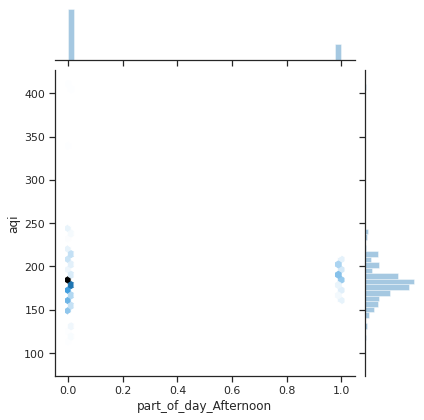

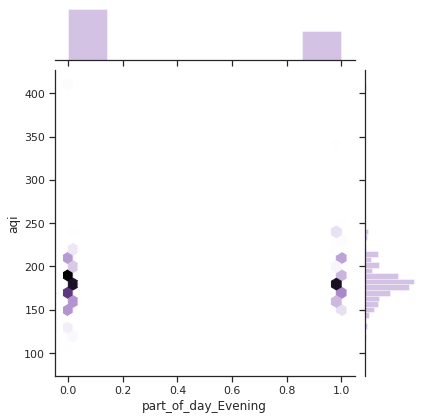

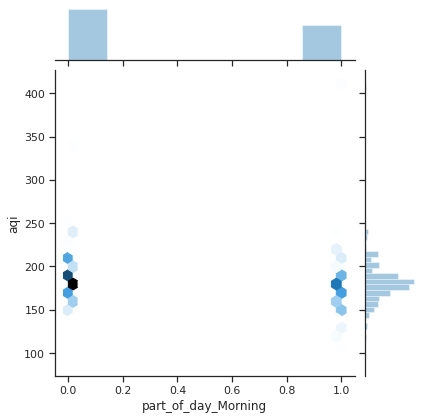

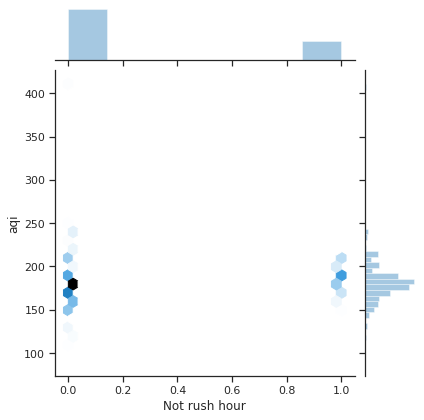

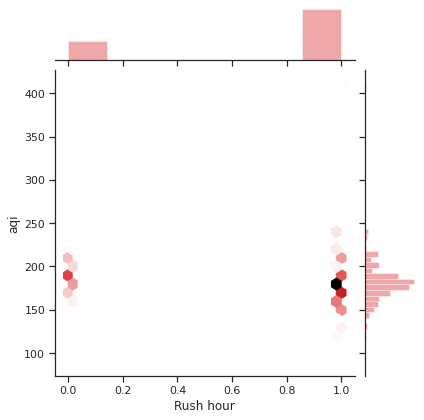

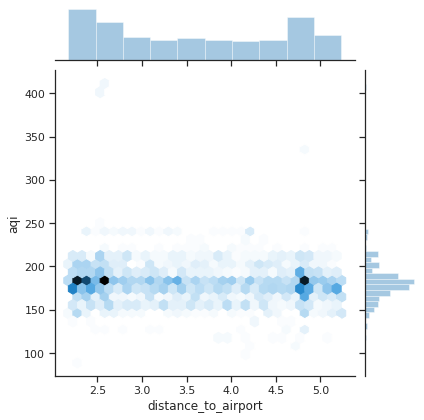

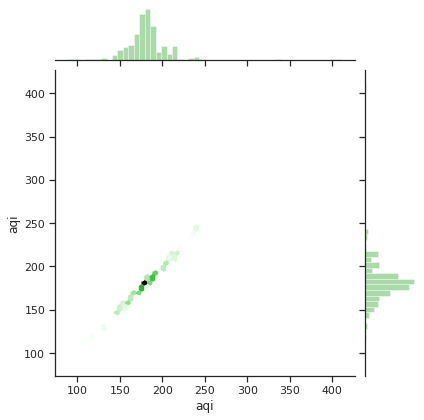

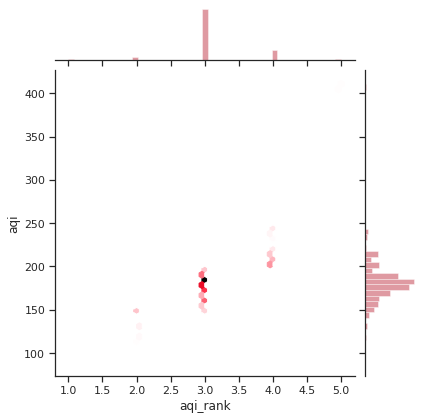

In [231]:
sns.set(style='ticks', color_codes=True)
for i in MNR_sensor_data_resampled_processed_combine_drop.columns.tolist():
    a = random.randint(0, len(scatter_colors) - 1)
    b = random.randint(0,len(line_colors) - 1)
    c = random.randint(0,len(marker_list) - 1)  
    sns.jointplot(x=i, y='aqi', data = MNR_sensor_data_resampled_processed_combine_drop, kind ='hex', color = line_colors[b])

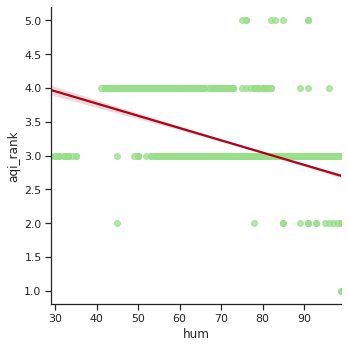

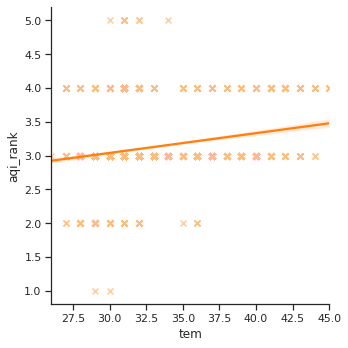

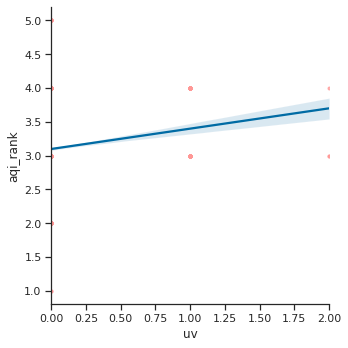

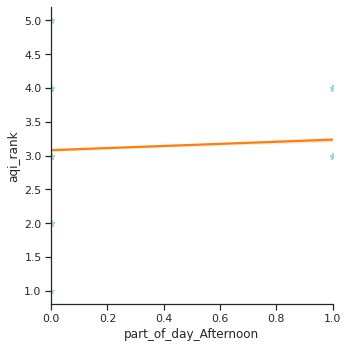

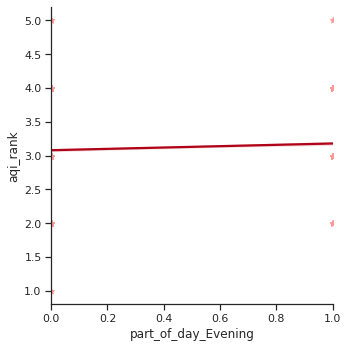

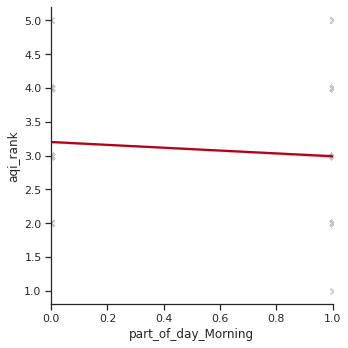

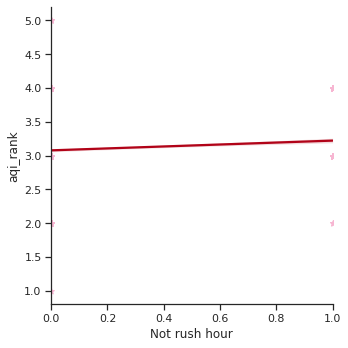

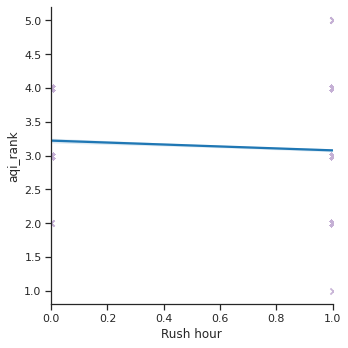

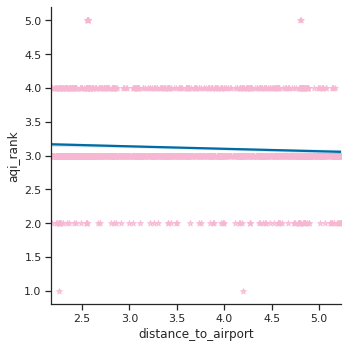

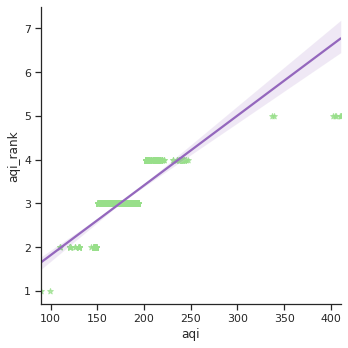

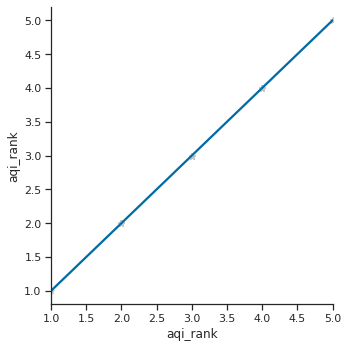

In [232]:
# Visualize linear relationships between each feature and AQI ranks
marker_list = ['x', 'o', '*','.']
sns.set(style='ticks', color_codes=True)
for i in MNR_sensor_data_resampled_processed_combine_drop.columns.tolist():
    a = random.randint(0, len(scatter_colors) - 1)
    b = random.randint(0,len(line_colors) - 1)
    c = random.randint(0,len(marker_list) - 1) 
    sns.lmplot(x=i, y='aqi_rank', data = MNR_sensor_data_resampled_processed_combine_drop, 
               scatter_kws = {'color':scatter_colors[a], 'alpha': 0.75}, line_kws={'color': line_colors[b]}, markers=marker_list[c])


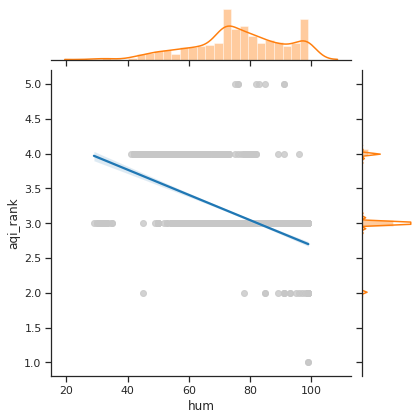

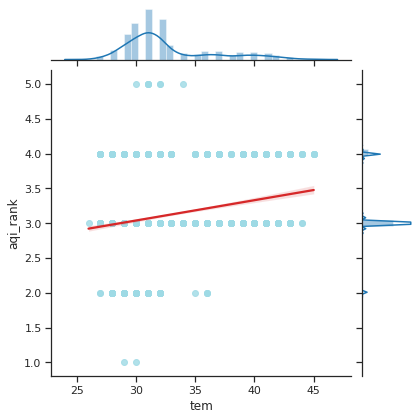

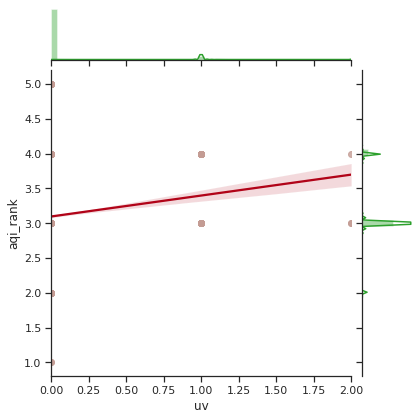

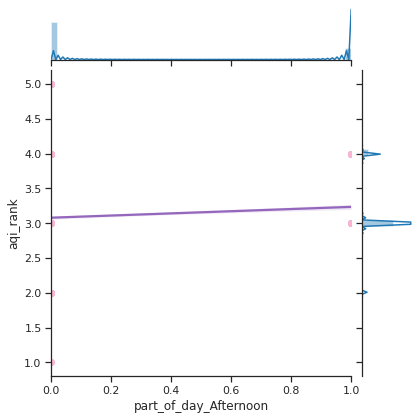

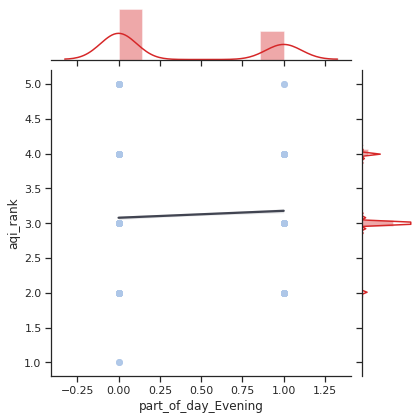

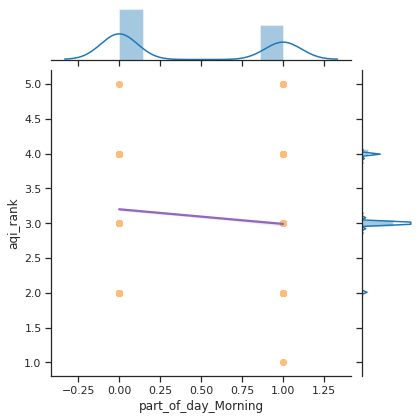

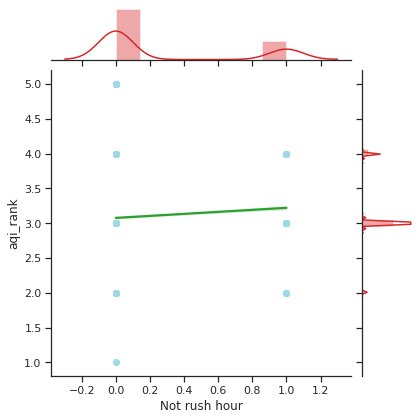

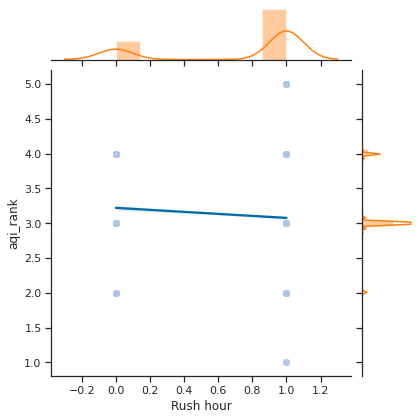

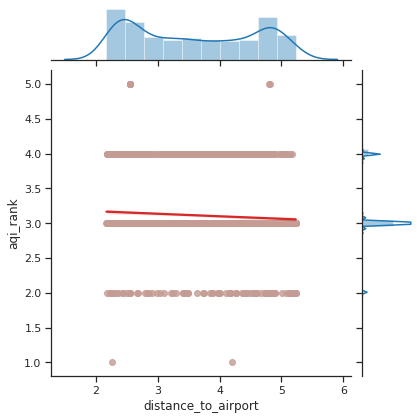

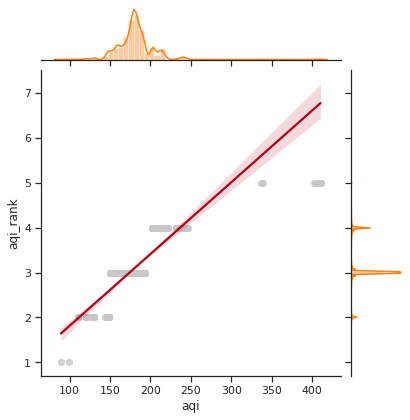

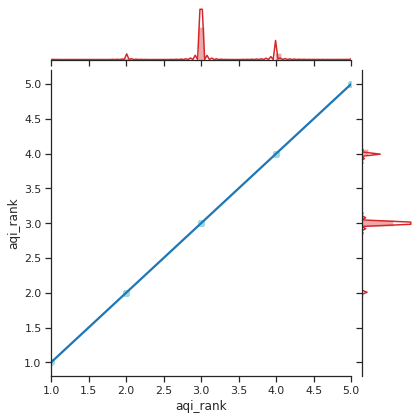

In [233]:
sns.set(style='ticks', color_codes=True)
for i in MNR_sensor_data_resampled_processed_combine_drop.columns.tolist():
    a = random.randint(0, len(scatter_colors) - 1)
    b = random.randint(0,len(line_colors) - 1)
    c = random.randint(0,len(marker_list) - 1)  
    sns.jointplot(x=i, y='aqi_rank', data = MNR_sensor_data_resampled_processed_combine_drop, kind ='reg', color = line_colors[c],
                  joint_kws={'line_kws':{'color':line_colors[b]}, 
                             'scatter_kws':{'color':scatter_colors[a]}})

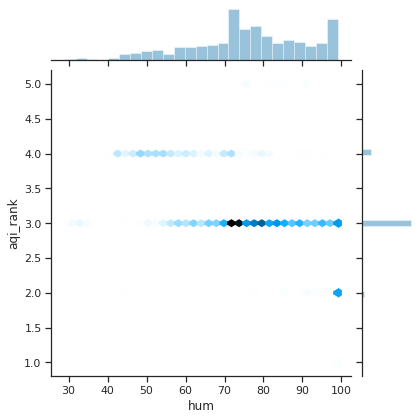

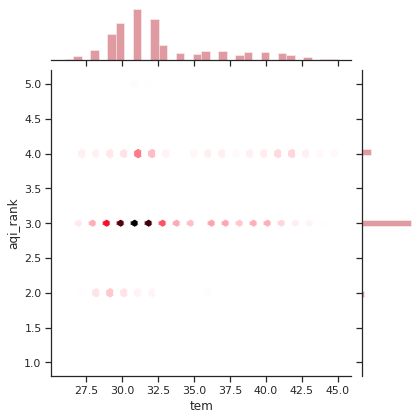

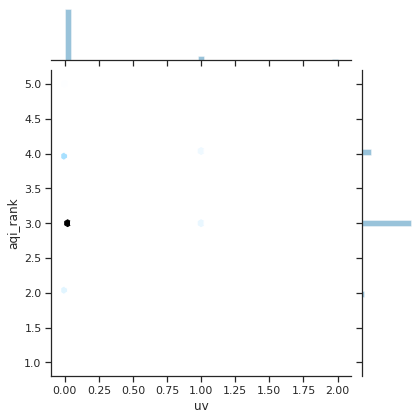

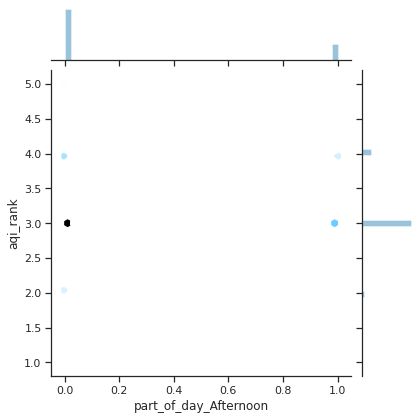

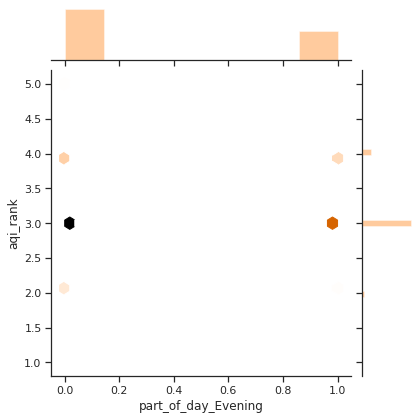

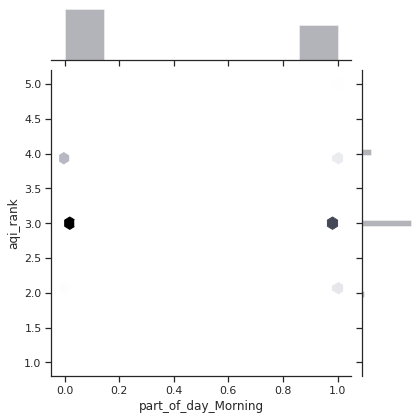

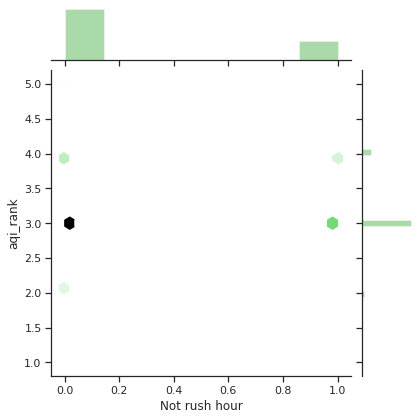

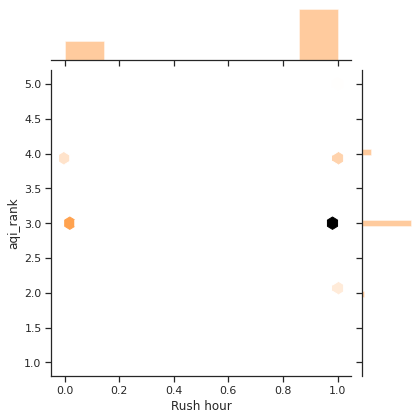

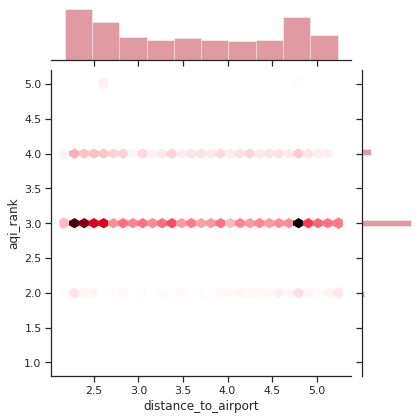

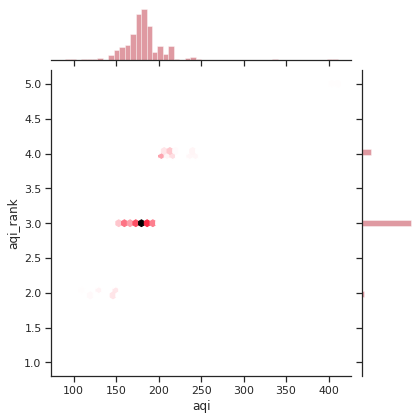

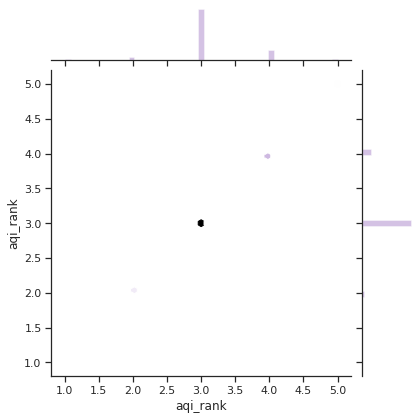

In [234]:
sns.set(style='ticks', color_codes=True)
for i in MNR_sensor_data_resampled_processed_combine_drop.columns.tolist():
    a = random.randint(0, len(scatter_colors) - 1)
    b = random.randint(0,len(line_colors) - 1)
    c = random.randint(0,len(marker_list) - 1)  
    sns.jointplot(x=i, y='aqi_rank', data = MNR_sensor_data_resampled_processed_combine_drop, kind ='hex', color = line_colors[b])